## Домашнее задание к лекции "Визуализация данных"


### Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

-построить не менее 4 визуализаций различных видов;  
-каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;  
-по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).  

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.  

### Дополнительная часть (необязательная)
-построить дополнительно не менее 2 визуализаций (итого не менее 6);  
-в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
import seaborn as sns

In [61]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

https://www.kaggle.com/benroshan/factors-affecting-campus-placement/version/1?select=Placement_Data_Full_Class.csv

In [5]:
df = pd.read_csv(r'C:\Users\Лина\OneDrive\Рабочий стол\study\PYDP-19\viz\Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


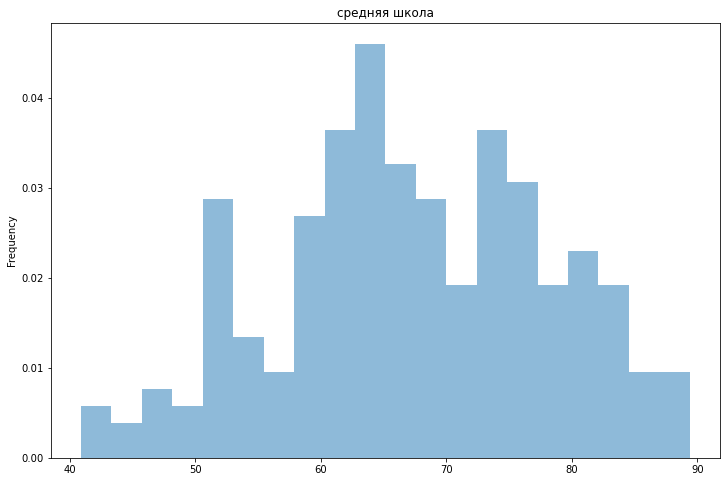

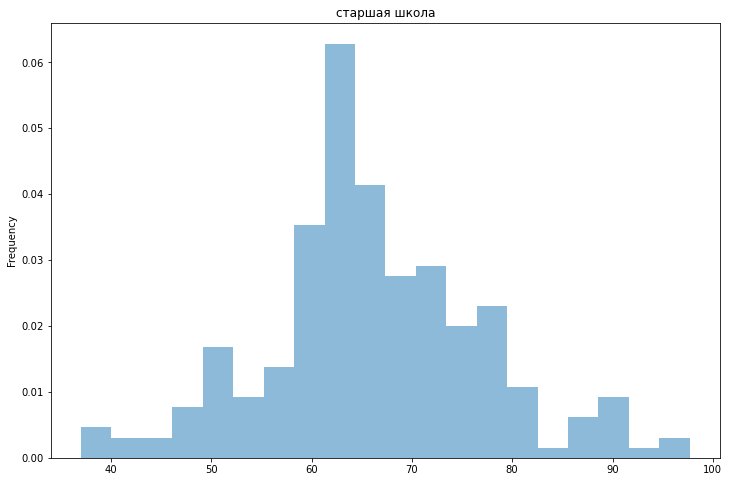

<AxesSubplot:title={'center':'колледж'}, ylabel='Frequency'>

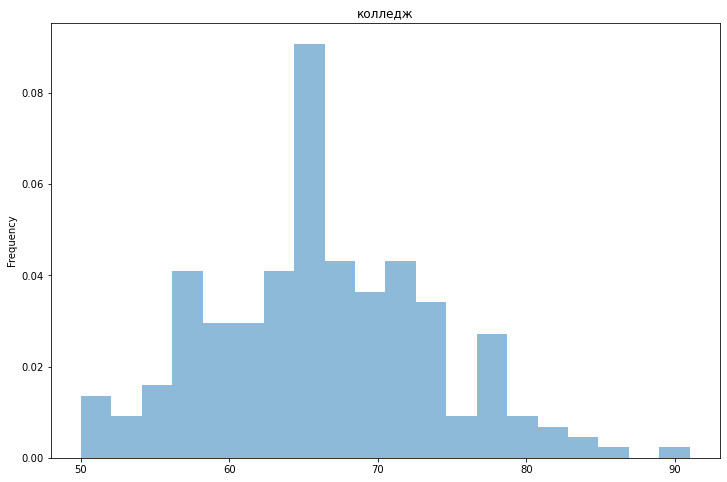

In [96]:
# для начала посмотрим как учились люди из выборки на разных уровнях образования
df['ssc_p'].plot(kind='hist',alpha = 0.5, bins=20, title='средняя школа', density = True)
plt.show()
df['hsc_p'].plot(kind='hist', alpha = 0.5, bins=20, title='старшая школа',density = True)
plt.show()
df['degree_p'].plot(kind='hist', alpha = 0.5, bins=20, title='колледж',density = True)

Text(0.5, 1.0, 'Распределение оценок на разных уровнях образования')

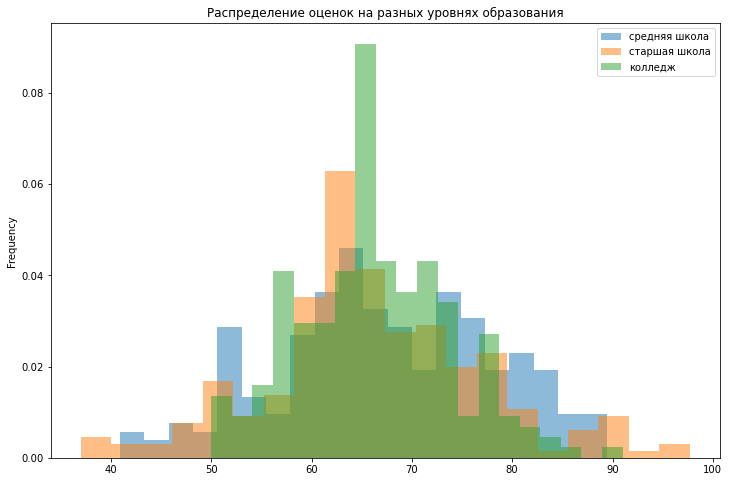

In [94]:
df['ssc_p'].plot(kind='hist',alpha = 0.5, bins=20,density = True)
df['hsc_p'].plot(kind='hist', alpha = 0.5, bins=20,density = True)
df['degree_p'].plot(kind='hist', alpha = 0.5, bins=20, density = True)
plt.legend(['средняя школа', 'старшая школа', 'колледж'], loc='upper right')
plt.title('Распределение оценок на разных уровнях образования')

In [ ]:
# можно отметить, что в средней школе высоких баллов у учеников больше, чем в старшей, где гистограмма смещается в сторону более низкого балла,а крайние значения становятся более "размазанными"
# но к этапу высшего образования картина больше стабилизируется, становится больше "середничков" и в целом разброс оценок становится меньшим

In [27]:
gender_placed = df.groupby(['gender', 'status']).count()[['sl_no']]
gender_placed

sl_no
gender status           
F      Not Placed     28
       Placed         48
M      Not Placed     39
       Placed        100

In [28]:
gender_placed = df.pivot_table(index = 'gender', columns = 'status', values = 'sl_no', aggfunc = 'count')
gender_placed

status,Not Placed,Placed
gender,,
F,28,48
M,39,100


<AxesSubplot:title={'center':'Трудоустройство в разрезе гендера'}, xlabel='Пол', ylabel='Количество соискателей'>

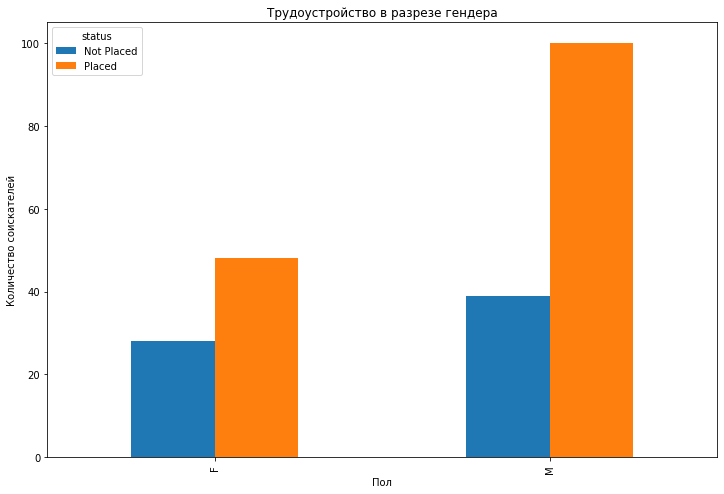

In [82]:
gender_placed.plot(kind='bar', title='Трудоустройство в разрезе гендера',
                   xlabel='Пол', label='Количество',
                   ylabel='Количество соискателей')

In [ ]:
# процент трудоустроенных молодых людей заметно выше, чем у девушек

In [84]:
field_of_degree_placed = df.pivot_table(index = 'degree_t', columns = 'status', values = 'sl_no', aggfunc = 'count')
field_of_degree_placed

status,Not Placed,Placed
degree_t,,
Comm&Mgmt,43,102
Others,6,5
Sci&Tech,18,41


<AxesSubplot:title={'center':'Трудоустройство в разрезе специальностей'}, xlabel='Специальность', ylabel='Количество соискателей'>

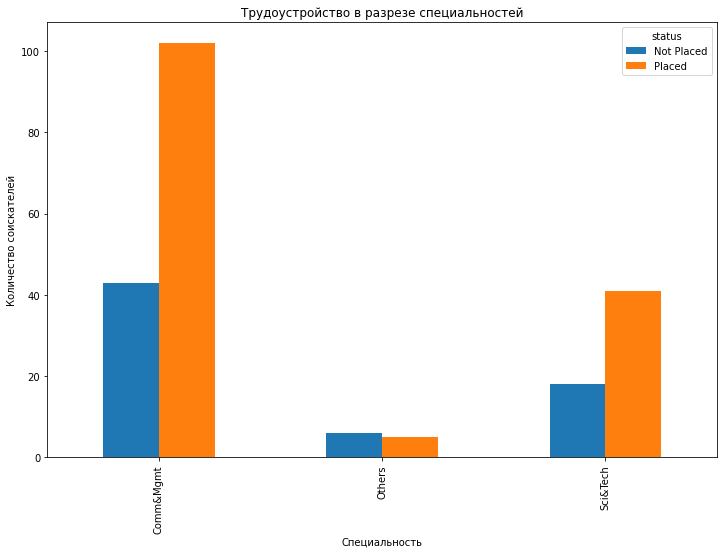

In [85]:
field_of_degree_placed.plot(kind='bar', title='Трудоустройство в разрезе специальностей',
                   xlabel='Специальность', label='Количество',
                   ylabel='Количество соискателей')

In [97]:
#  по двум основным специальностям соотношение трудоустроенных и нет сопостовимо, 
# несмотря на то, что на направлении менеджмента в абсолютных величинах училось больше.
# спрос на работников этих сфер относительно схож

<AxesSubplot:title={'center':'взаимосвязь выпускных оценок и зарплатой'}, xlabel='degree_p', ylabel='salary'>

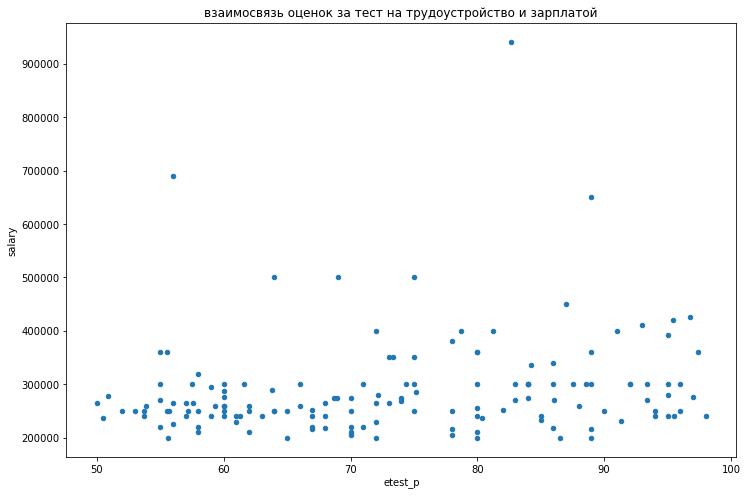

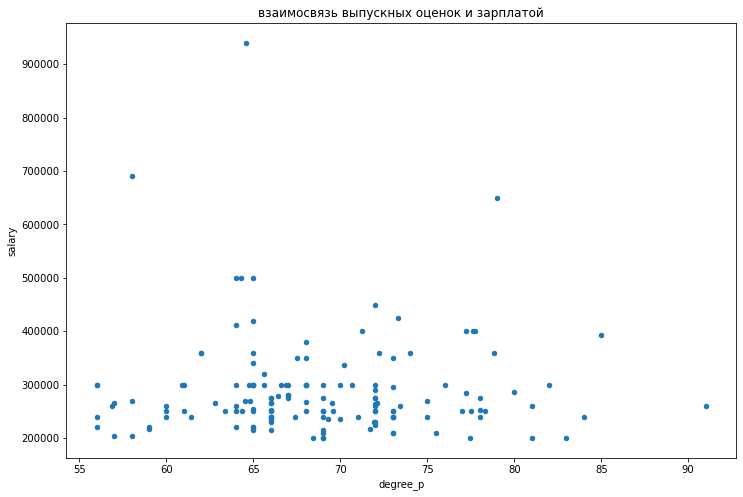

In [130]:
# посмотрим на взаимосвязь оценок за тест на трудоустройство и зарплатой
df.plot(kind='scatter', 
        x='etest_p', 
        y='salary', 
        title='взаимосвязь оценок за тест на трудоустройство и зарплатой')
df.plot(kind='scatter', 
        x='degree_p', 
        y='salary', 
        title='взаимосвязь выпускных оценок и зарплатой')

In [ ]:
# более высокие оценки за тест не сильно сказываются на нижнем уровне зарплаты, 
# но разброс по диапазону вверх становится ощутимо больше начиная с 75 баллов
# при этом несколько выбросов есть как при средних так и при высоких баллах

In [ ]:
# выпускные баллы в целом довольно скучены, выбросы по зп есть на разных уровнях, но что интересно нет явного роста зарплаты 
# при очень высоких баллах, в отличии от пред.распределения, наибольшие зарплаты у выпускников "середничков"

In [ ]:
# соединим два предыдущих графика в один 

<AxesSubplot:title={'center':'взаимосвязь оценок за тест на трудоустройство, выпускных баллов и зарплатой'}, xlabel='etest_p', ylabel='degree_p'>

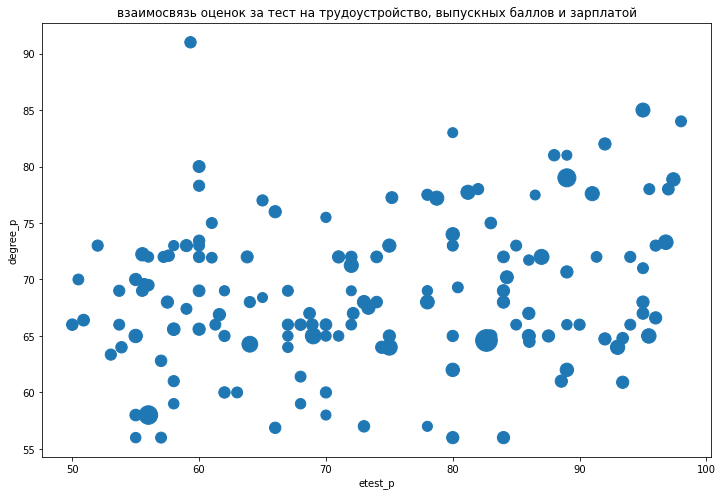

In [131]:
df.plot(kind='scatter', 
        x='etest_p', 
        y='degree_p', 
        s=df['salary']*0.0005,
        title='взаимосвязь оценок за тест на трудоустройство, выпускных баллов и размером зарплаты')

In [ ]:
# визуализируем в более явном виде распределение зарплат на "ящике с усами"
# и увидим компактный ящик с небольшими усами, явную область с зарпплатами выше верхней границы размаха 
# и отдельные сильные выбросы в большую сторону, которые было бы интересно поисследовать и выявить закономерности

<AxesSubplot:title={'center':'Распределение зарплат'}>

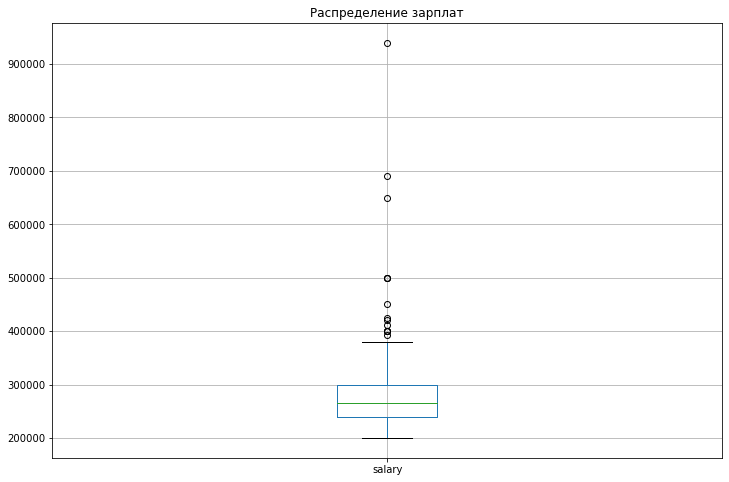

In [98]:
df['salary'].plot(kind='box',
                   title='Распределение зарплат', grid=True)

In [ ]:
# построим распределение зарплат в разрезе опыта работы

Text(0, 0.5, 'Зарплата')

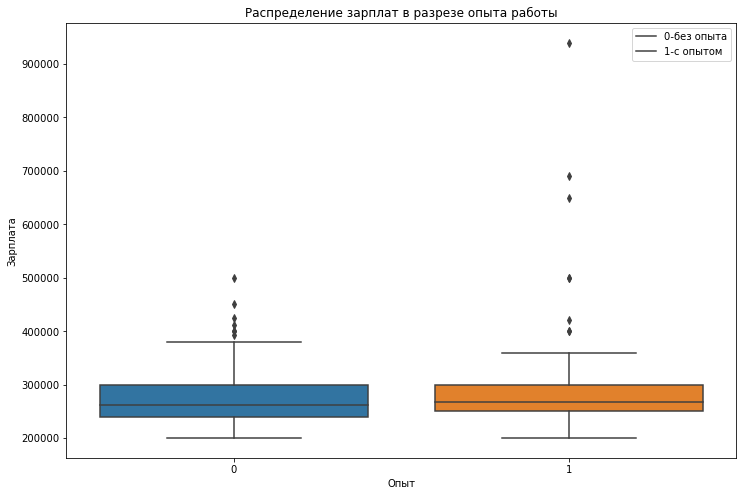

In [159]:
sns.boxplot(data=[df.loc[df.workex=='No', ['salary']], df.loc[df.workex=='Yes', ['salary']]])
plt.legend(['0-без опыта', '1-с опытом'], loc='upper right')
plt.title('Распределение зарплат в разрезе опыта работы')
plt.xlabel('Опыт')
plt.ylabel('Зарплата')

In [ ]:
# "ящик" для неопытных шире, выбросы скучены за верхней границей, но сам верхний "ус" больше, чем у людей с опытом
# у опытных "ящик" уже, но есть значительные выбросы вверх 

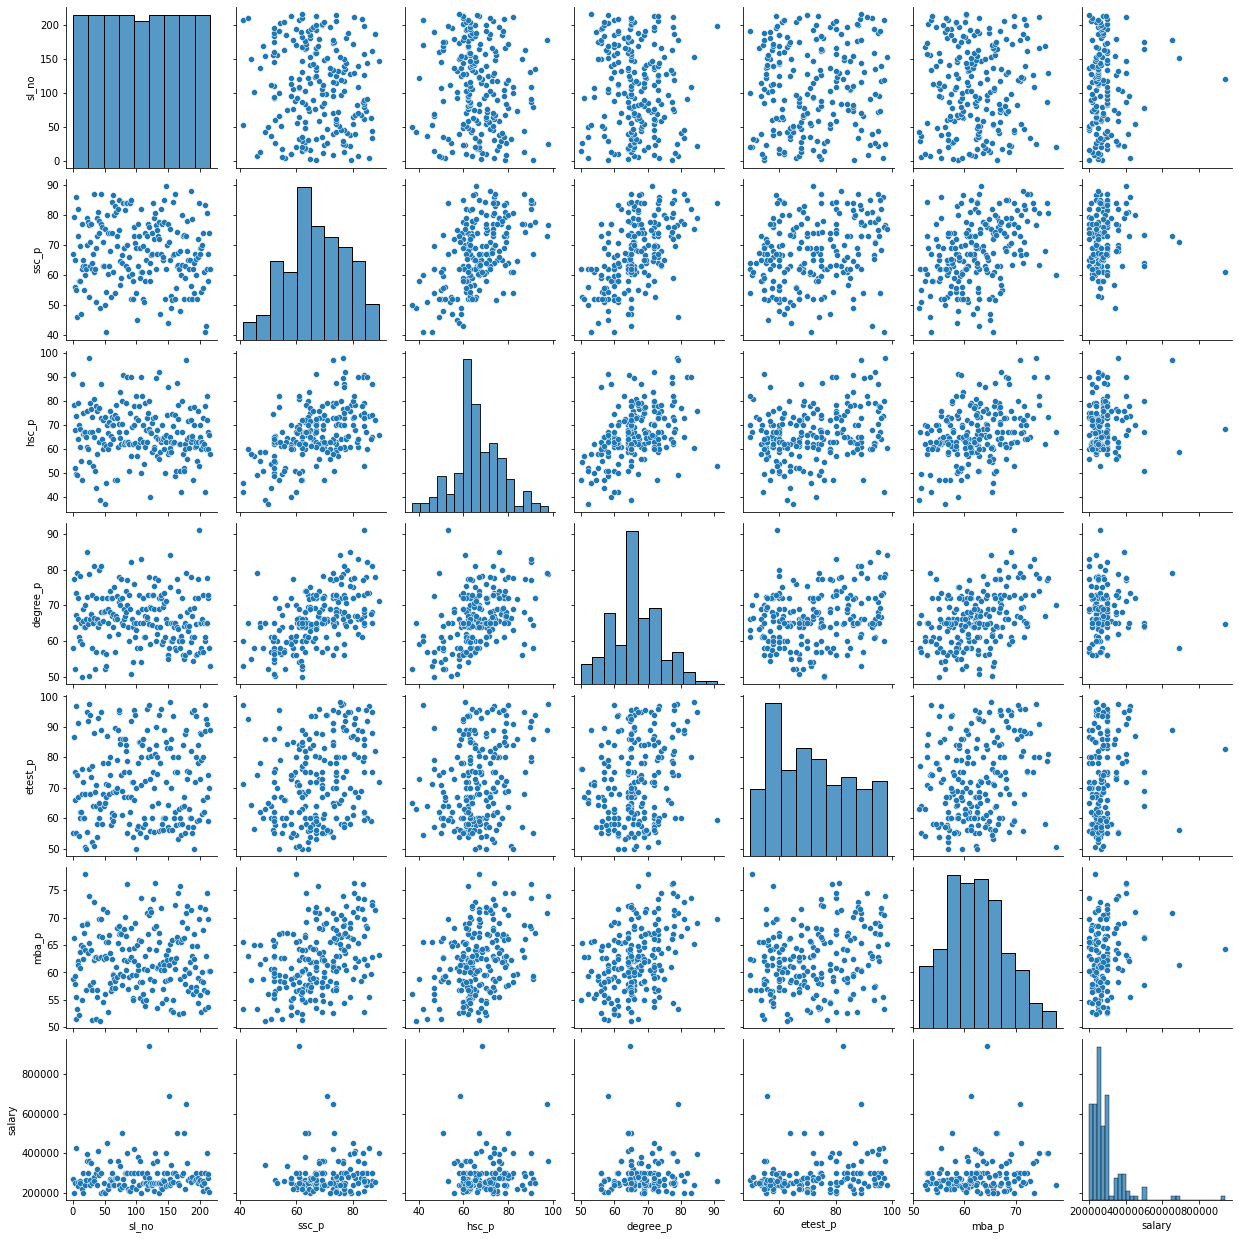

In [132]:
sns.pairplot(df)